<center><img src="fintech_banner_image.png"></center>

# Bank customer churn analysis

## Problem statement:
In the rapidly evolving banking sector, customer retention has become a critical concern. Banks are increasingly seeking to understand the factors that influence customer decisions to stay with or leave their banking service provider. This project focuses on analyzing a dataset containing various attributes of bank customers to identify key predictors of customer churn. By leveraging data analytics, we aim to uncover patterns and insights that could help devise strategies to enhance customer retention and reduce churn rates.

Dataset:
https://drive.google.com/file/d/1xh7D0NDmxdg6IXTFzi_T-Oc5D-GtI44W/view?usp=sharing

Data Dictionary:
The data dictionary is available here: https://docs.google.com/document/d/17QC3Bxcy1iGsDEJFoWVR2_YyXDltkAcK3NEiy0E0p6Q/edit?usp=sharing

# Import Libraries and Data Preparation

In [75]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_ind,f_oneway, levene, kruskal, shapiro, chi2_contingency
from statsmodels.graphics.gofplots import qqplot

import warnings
warnings.filterwarnings("ignore")

pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [3]:
# Importing the csv file adn creating a dataframe

df = pd.read_csv('Bank-Records.csv')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [5]:
# No of rows and columns

df.shape

(10000, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [7]:
df.nunique()

RowNumber             10000
CustomerId            10000
Surname                2932
CreditScore             460
Geography                 3
Gender                    2
Age                      70
Tenure                   11
Balance                6382
NumOfProducts             4
HasCrCard                 2
IsActiveMember            2
EstimatedSalary        9999
Exited                    2
Complain                  2
Satisfaction Score        5
Card Type                 4
Point Earned            785
dtype: int64

From the above, we will not require the first 2 attributes as the are specific to a customer. It is borderline with the surname as this would result to profiling so we exclude this as well.

In [8]:
# Drop the columns as explained above

df = df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [9]:
# Review the top rows of what is left of the data frame
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [10]:
# Check variable data types
df.dtypes

CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

So we moslty have categorical variables

In [11]:
# Checking null values

df.isna().sum()

CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [12]:
# Checking duplicated values

df.duplicated().sum()

0

Insights
* There are no duplicates in the dataset

# 1. Descriptive Statistics

### Basic Statistics

In [13]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203800,0.402842,0.00,0.00,0.000,0.0000,1.00
Complain,10000.0,0.204400,0.403283,0.00,0.00,0.000,0.0000,1.00


In [14]:
df.describe(include=object).transpose()

,count,unique,top,freq
Geography,10000,3,France,5014
Gender,10000,2,Male,5457
Card Type,10000,4,DIAMOND,2507


### Distribution Analysis

In [34]:
color_map = ['#5c1919','#7b2a1f','#993e22','#b65522','#d16e1f','#ea8916','#ffa600']

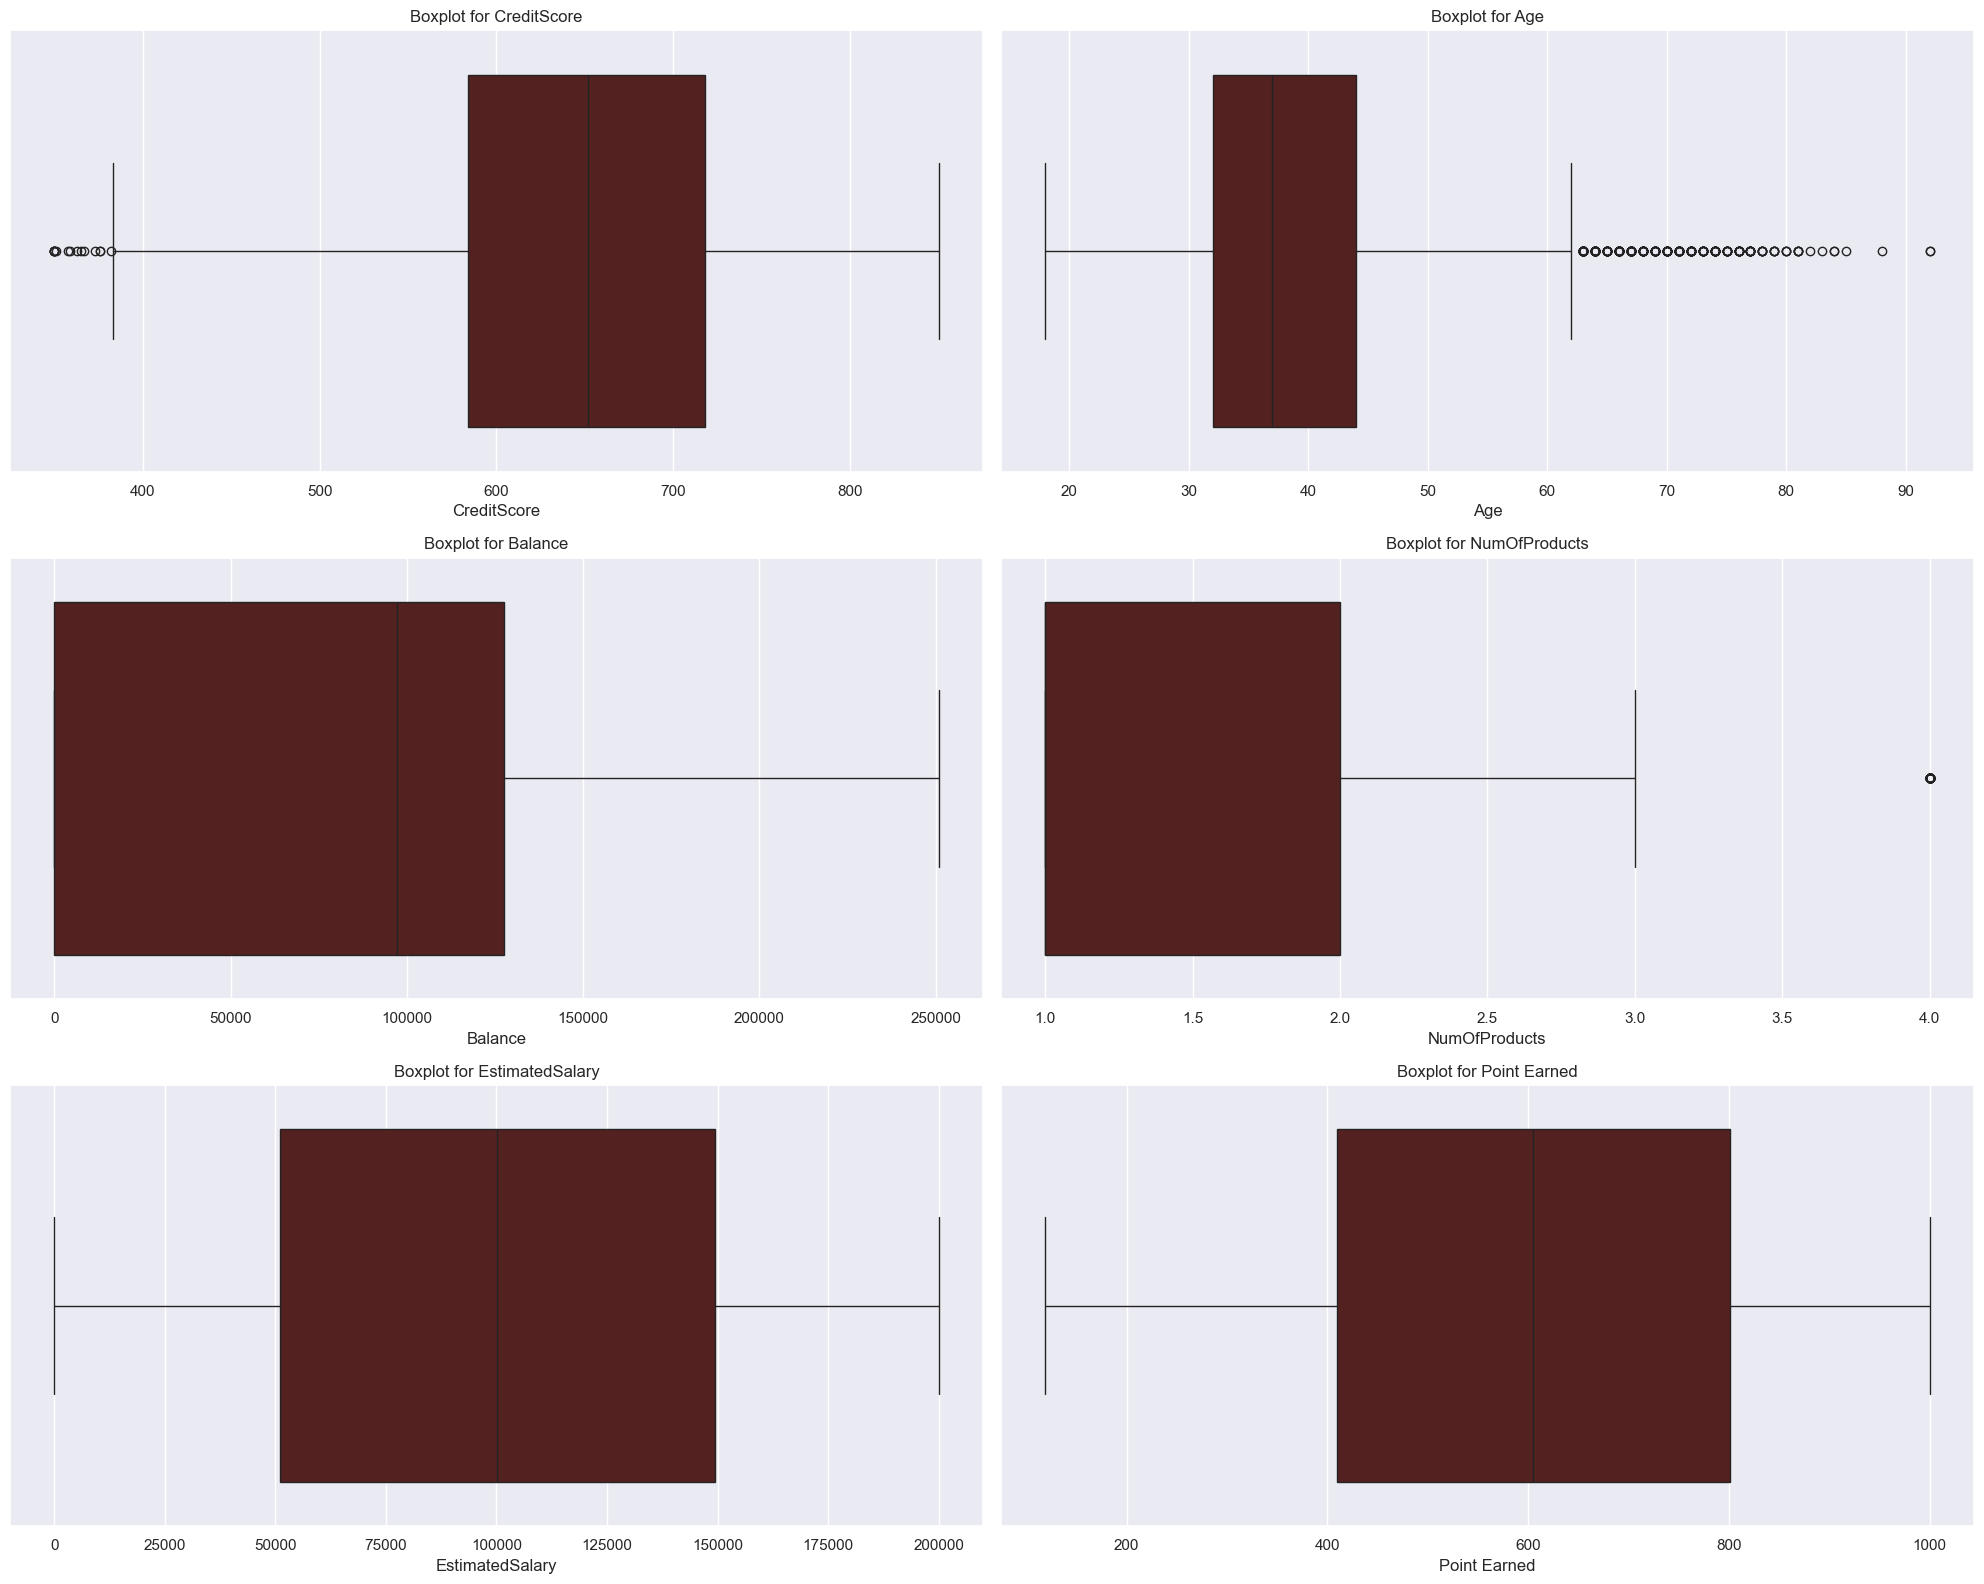

In [15]:
plt.figure(figsize=(20, 16))
sns.set(style="darkgrid")

num_cols = ['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Point Earned']

for i, column in enumerate(num_cols,1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=column, data=df, color="#5c1919")
    plt.title(f'Boxplot for {column}')

plt.tight_layout()
plt.show()

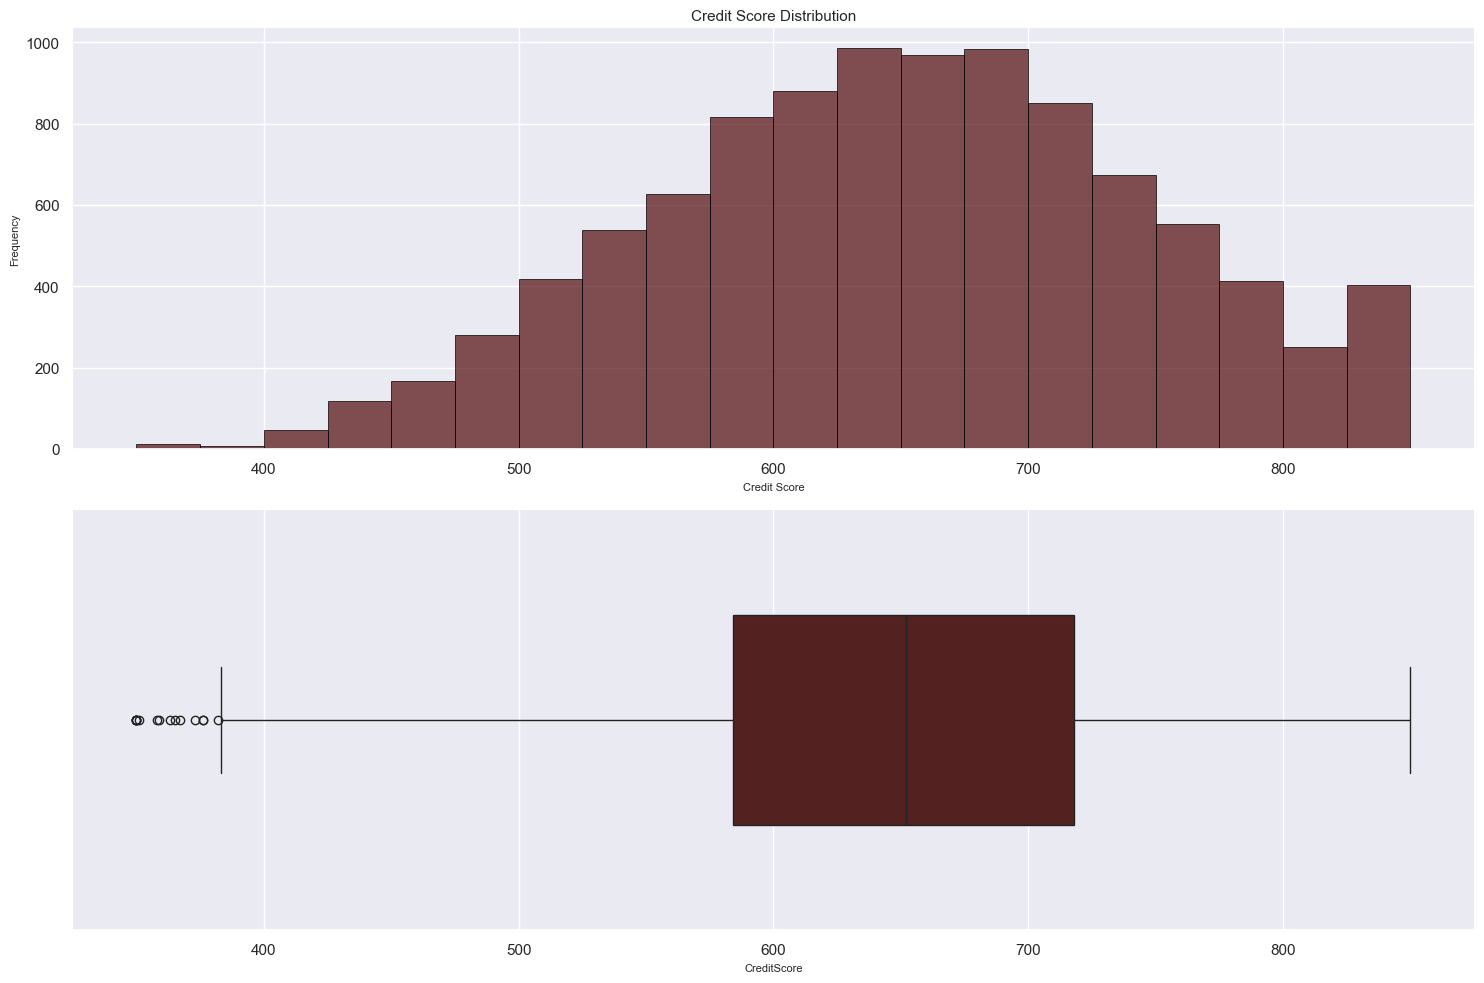

In [70]:
fig = plt.figure(figsize = (15,10))
sns.set(style="darkgrid")
plt.subplot(2,1,1)
sns.histplot(df['CreditScore'],color ="#5c1919",linewidth=0.5,edgecolor='black',bins=20)
plt.title('Credit Score Distribution',fontproperties = {'size':11})
plt.xlabel('Credit Score', fontsize = 8)
plt.ylabel('Frequency',fontsize = 8)
for pos in ['right', 'top', 'left']: 
    plt.gca().spines[pos].set_visible(False)

plt.subplot(2,1,2)
sns.boxplot(data=df, x = 'CreditScore',color ="#5c1919",width=0.5)
plt.xlabel('CreditScore',fontsize = 8)

for pos in ['right', 'top', 'left']: 
    plt.gca().spines[pos].set_visible(False)

plt.tight_layout()
plt.show()

In [71]:
boxplot = plt.boxplot(data=df, x = 'CreditScore',widths = 0.5)
plt.close()
median = df['CreditScore'].quantile(0.5)
info = [i.get_ydata() for i in boxplot['whiskers']]
print("min : ",info[0][1])
print("Q1 : ",info[0][0])
print("median : ",median)
print("Q3 : ",info[1][0])
print("max : ",info[1][1])

min :  383.0
Q1 :  584.0
median :  652.0
Q3 :  718.0
max :  850.0


### Insights

1. **Credit Score Range:**
   - The credit scores range from a minimum of 383 to a maximum of 850. This indicates a wide variation in creditworthiness among the customers.

2. **Outliers Analysis:**
   - There are outliers present below the minimum value of 383. These outliers could indicate customers with significantly poor credit histories or errors in the data that might require further investigation.

3. **Central Tendency:**
   - The median credit score is 652, which suggests that half of the customers have a credit score below 652 and the other half above it. This value can be considered as a typical customer’s credit score.

4. **Quartile Insights:**
   - The first quartile (Q1) is 584, meaning that 25% of the customers have a credit score below 584. This segment may be considered high-risk borrowers.
   - The third quartile (Q3) is 718, indicating that 25% of the customers have a credit score above 718. This segment represents low-risk borrowers.

5. **Credit Score Segmentation:**
   - Customers can be segmented into different risk categories based on their credit scores:
     - **Low Risk:** Scores above 718 (top 25% of customers)
     - **Moderate Risk:** Scores between 584 and 718 (middle 50% of customers)
     - **High Risk:** Scores below 584 (bottom 25% of customers)

# 2. Exploratory Data Analysis

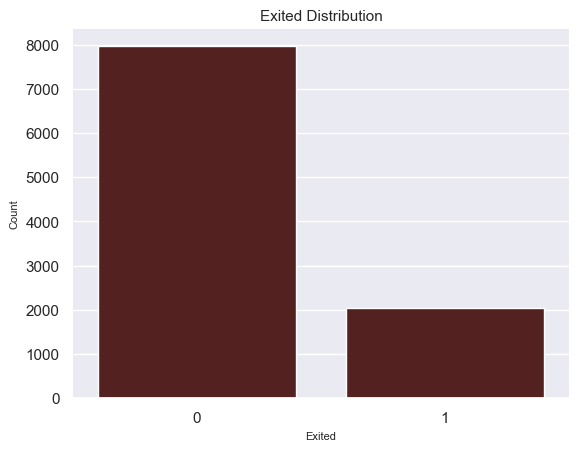

In [16]:
sns.countplot(data=df,x='Exited',color ="#5c1919")
plt.title('Exited Distribution',fontproperties = {'size':11})
plt.xlabel('Exited', fontsize = 8)
plt.ylabel('Count',fontsize = 8)
for pos in ['right', 'top', 'left']: 
    plt.gca().spines[pos].set_visible(False)
plt.show()

In [17]:
df[df['Exited']==1]['Exited'].count()

2038

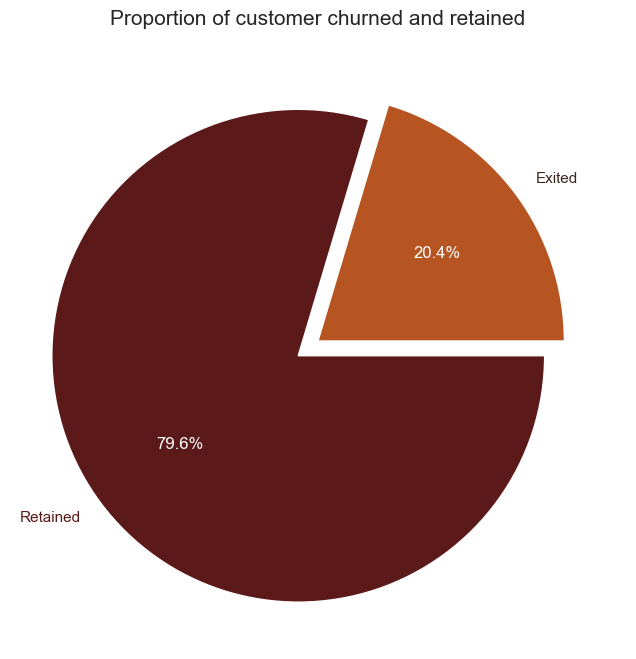

In [18]:
labels = 'Exited','Retained'
sizes = [df[df['Exited']==1]['Exited'].count(),df[df['Exited']==0]['Exited'].count()]
label_colors = ['#3e271e','#5c1919']
explode = 0,0.1
fig1, ax1 = plt.subplots(figsize=(10, 8))
wedges, texts, autotexts = ax1.pie(sizes,explode=explode, labels=labels,autopct='%1.1f%%',colors=['#b65522','#5c1919'],textprops={'color':'white'},)
for i, text in enumerate(texts):
    text.set_color(label_colors[i])
    plt.title('Proportion of customer churned and retained',fontproperties = {'size':15})
plt.show()

## 2.1 Correlation Analysis

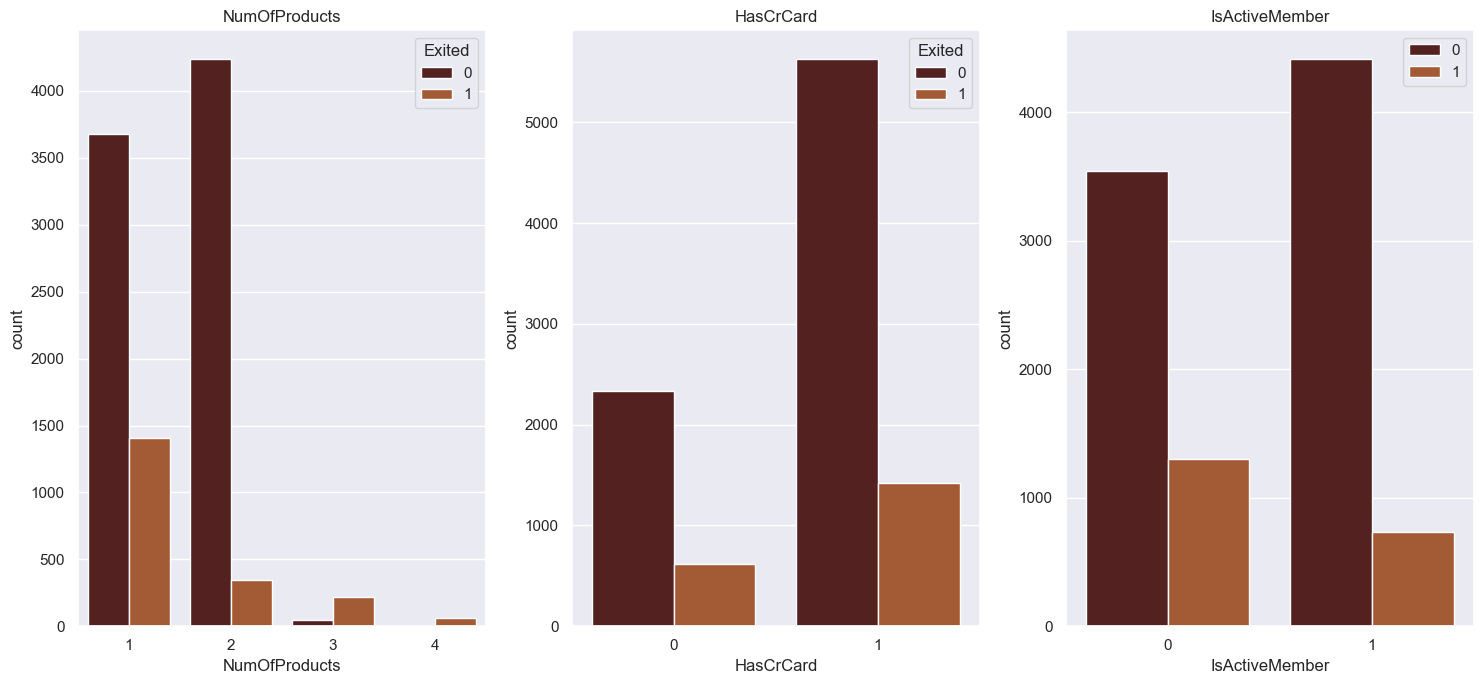

In [19]:
plt.figure(figsize=(15, 7))
sns.set(style="darkgrid")

cat_cols = ['NumOfProducts', 'HasCrCard', 'IsActiveMember']

for i, column in enumerate(cat_cols,1):
    plt.subplot(1, 3, i)
    sns.countplot(x=column, data=df, palette=["#5c1919","#b65522"], hue='Exited')
    plt.title(f'{column}')
    
plt.legend()
plt.tight_layout()
plt.show()

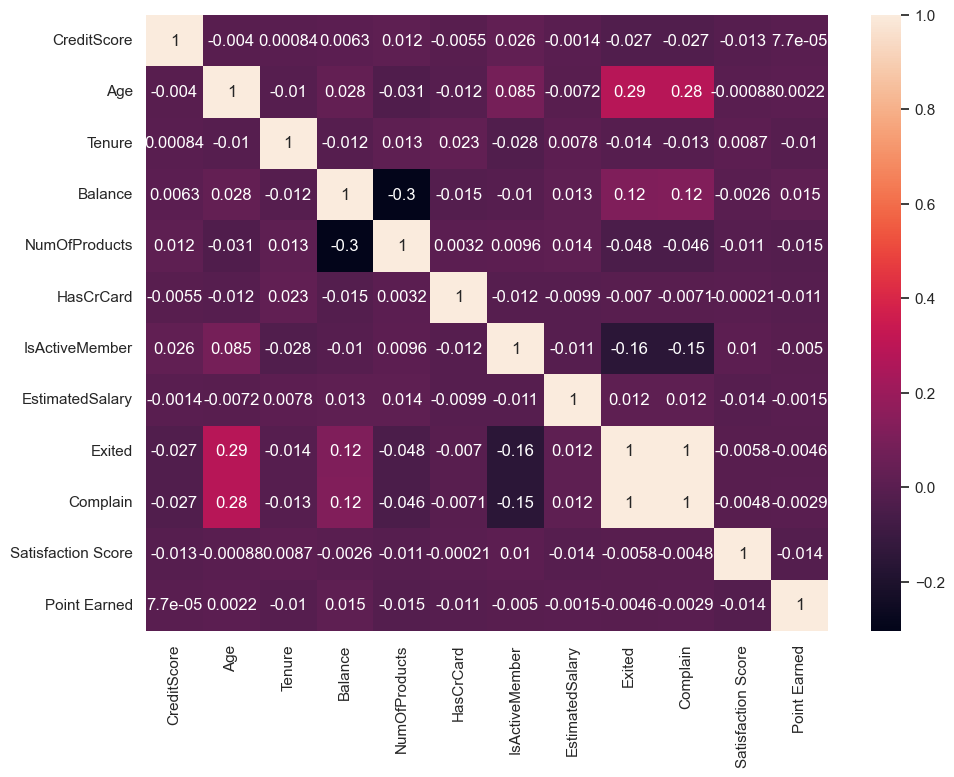

In [20]:
int_df = df.select_dtypes(include=['int64', 'float64',])
sns.set(style="darkgrid")
plt.subplots(figsize=(11,8))
sns.heatmap(int_df.corr(), annot=True)
plt.show()

### Insights

1. **Age and Exited:**
   - There is a moderate positive correlation (0.29) between `Age` and `Exited`, indicating that older customers are more likely to leave the bank.

2. **Complain and Exited:**
   - The `Complain` column also shows a moderate positive correlation (0.28) with `Exited`, suggesting that customers who have lodged complaints are more likely to exit.

3. **Age and Complain:**
   - There is a moderate positive correlation (0.28) between `Age` and `Complain`, meaning older customers are more likely to complain.

4. **NumOfProducts and Balance:**
   - A notable negative correlation (-0.3) exists between `NumOfProducts` and `Balance`. This could indicate that customers with fewer products tend to maintain higher balances, or vice versa.

5. **Exited and Balance:**
   - There is a weak positive correlation (0.12) between `Exited` and `Balance`, suggesting a slight tendency for customers with higher balances to leave the bank.

6. **CreditScore and Exited:**
   - The correlation between `CreditScore` and `Exited` is very weak (-0.027), indicating that credit score is not a significant factor in predicting customer exit.

7. **Satisfaction Score and Exited:**
   - The correlation between `Satisfaction Score` and `Exited` is very weak (-0.0058), suggesting satisfaction score has minimal impact on whether a customer exits.

8. **IsActiveMember and Exited:**
   - A weak negative correlation (-0.16) between `IsActiveMember` and `Exited` indicates that active members are slightly less likely to exit.

9. **Other Notable Weak Correlations:**
   - `HasCrCard` and other variables show negligible correlations, indicating that possession of a credit card does not strongly relate to other factors in this dataset.

## 2.2 Customer Profile Analysis

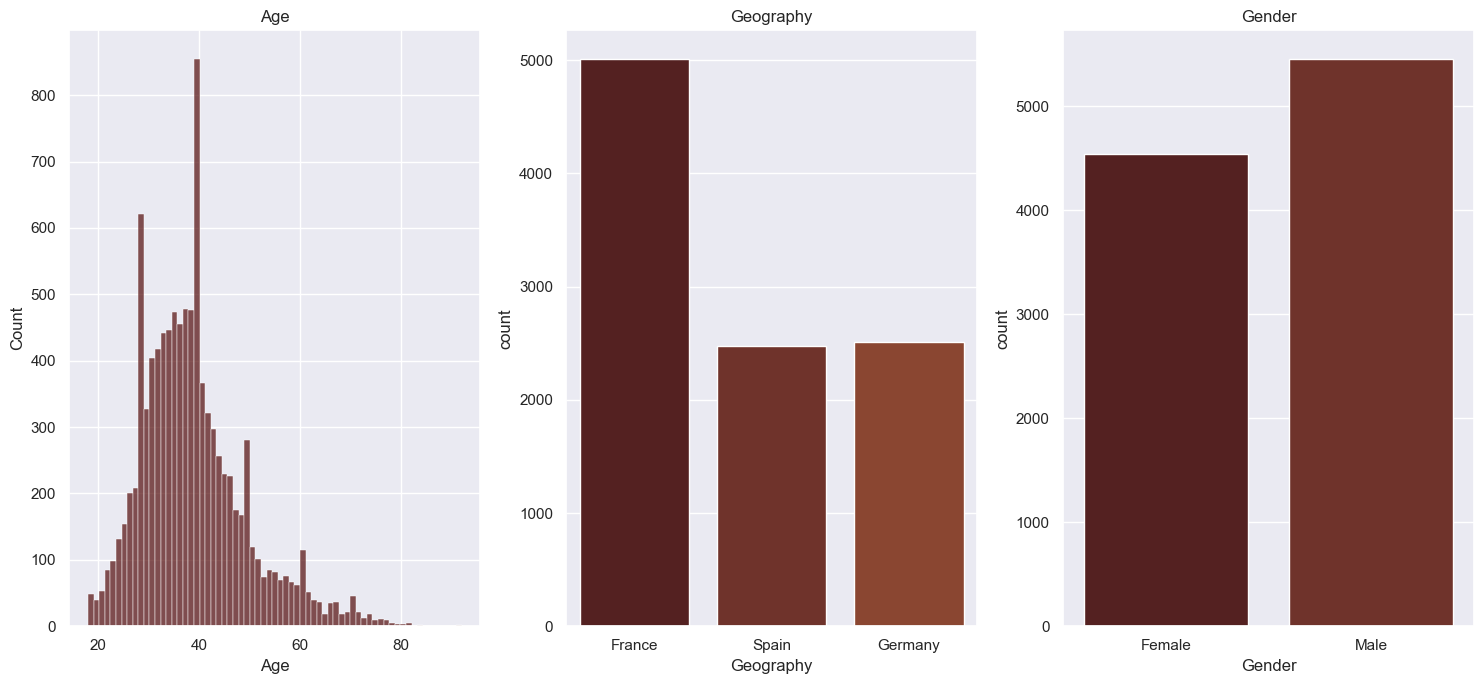

In [64]:
# Let's visualize the distribution of Age, Geography and Gender

plt.figure(figsize=(15, 7))
sns.set(style="darkgrid")

plt.subplot(1, 3, 1)
sns.histplot(x='Age', data=df, color=color_map[0])
plt.title('Age')

cust_profile = ['Geography','Gender']

for i, column in enumerate(cust_profile,2):
    plt.subplot(1, 3, i)
    sns.countplot(x=column, data=df, palette=color_map)
    plt.title(f'{column}')
    
plt.tight_layout()
plt.show()

In [22]:
#Now let's visualize the distribution of age, geography and gender based on the churns

# Calculate churn rates by Age Group
df['AgeGroup'] = pd.cut(df['Age'], bins=[18, 30, 40, 50, 60, 70, 80,90], labels=['18-29', '30-39', '40-49', '50-59', '60-69', '70-80','80-90'])
age_churn = df.groupby('AgeGroup')['Exited'].mean().reset_index()

# Calculate churn rates by Geography
geo_churn = df.groupby('Geography')['Exited'].mean().reset_index()

# Calculate churn rates by Gender
gender_churn = df.groupby('Gender')['Exited'].mean().reset_index()

In [23]:
geo_churn.iloc[:,0]

0     France
1    Germany
2      Spain
Name: Geography, dtype: object

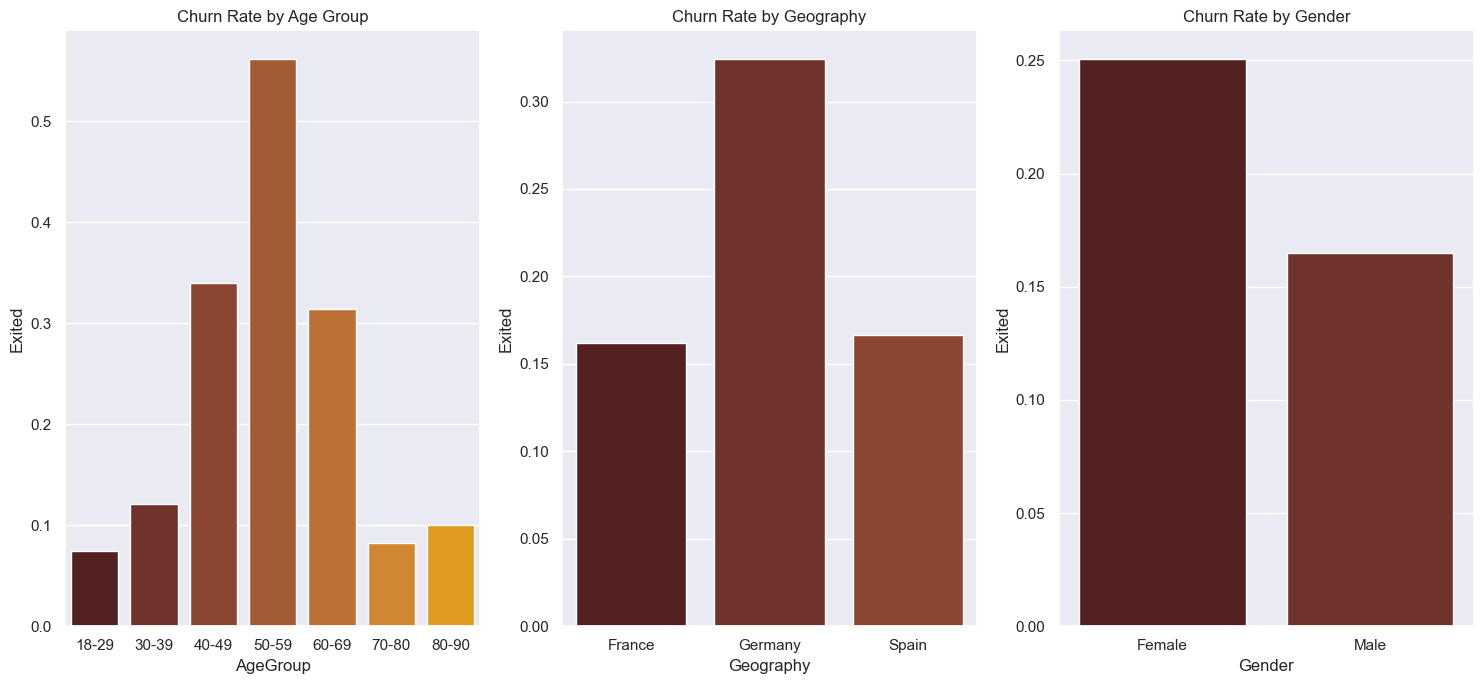

In [65]:
plt.figure(figsize=(15, 7))
sns.set(style="darkgrid")

cust_profile = [age_churn,geo_churn,gender_churn]
col_title = ['Age Group', 'Geography', 'Gender']

for i, column in enumerate(cust_profile,1):
    plt.subplot(1, 3, i)
    sns.barplot(x=column.iloc[:,0], data=column, palette=color_map,y='Exited')
    plt.title(f'Churn Rate by {col_title[i-1]}')
    
plt.tight_layout()
plt.show()

In [66]:
# Performing t-test for Age
churned_age = df[df['Exited'] == 1]['Age']
non_churned_age = df[df['Exited'] == 0]['Age']

t_stat_age, p_value_age = ttest_ind(churned_age, non_churned_age)

t_stat_age, p_value_age

(29.76379695489027, 1.3467162476197306e-186)

In [67]:
geo_contingency_table = pd.crosstab(df['Geography'], df['Exited'])

# Performing chi-squared test
chi2_stat_geo, p_val_geo, dof_geo, ex_geo = chi2_contingency(geo_contingency_table)

chi2_stat_geo, p_val_geo

(300.6264011211942, 5.245736109572763e-66)

In [68]:
gender_contingency_table = pd.crosstab(df['Gender'], df['Exited'])

# Performing chi-squared test
chi2_stat_gender, p_val_gender, dof_gender, ex_gender = chi2_contingency(gender_contingency_table)

chi2_stat_gender, p_val_gender

(112.39655374778587, 2.9253677618642e-26)

### Visual Insights
#### Age Group Insights
- **High Churn Rate in Middle-Aged Groups:**
   - The highest churn rate is observed in the 50-59 age group, followed by the 40-49 and 60-69 age groups. 
   - This suggests that middle-aged customers are more likely to leave the bank compared to younger or older customers.

#### Geography Insights
- **High Churn Rate in Germany:**
   - Customers from Germany have the highest churn rate compared to those from France and Spain.
   - This indicates potential issues specific to the German market that need to be addressed.

#### Gender Insights
- **Higher Churn Rate Among Females:**
   - Female customers have a higher churn rate compared to male customers.
   - This suggests that female customers may have unmet needs or face issues leading them to leave the bank more frequently.

### Statistcal Insights
- Since the p_val_age is less than 0.05, we reject the null hypothesis, indicating that the difference in average age between churned and non-churned customers is statistically significant.
- Since the p_val_geo and p_val_gender is less than 0.05, we reject the null hypothesis, indicating that the association between geography/gender and churn is statistically significant.


# Behavioural Analysis

## Product and Services Usage:

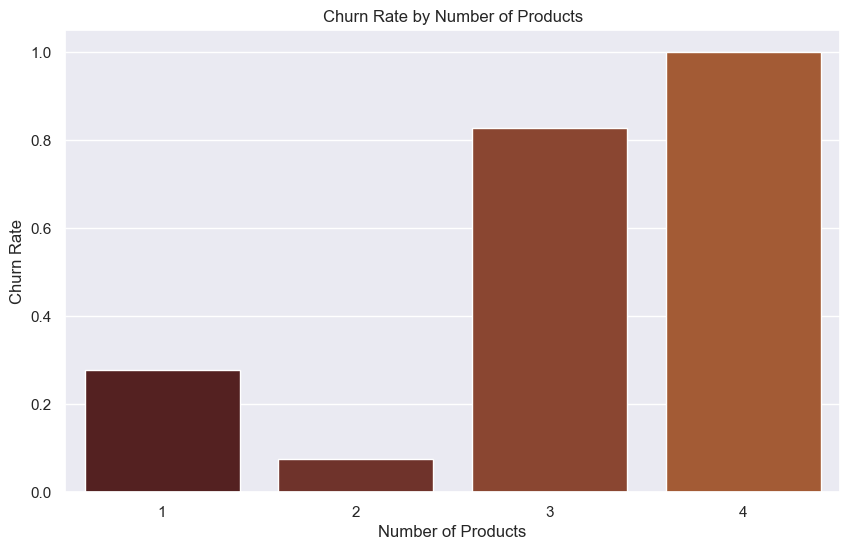

In [25]:
product_churn = df.groupby('NumOfProducts')['Exited'].mean().reset_index()

# Plot churn rate by number of products
plt.figure(figsize=(10, 6))
sns.barplot(data=product_churn, x='NumOfProducts', y='Exited', palette=['#5c1919','#7b2a1f','#993e22','#b65522','#d16e1f','#ea8916','#ffa600'])
plt.title('Churn Rate by Number of Products')
plt.xlabel('Number of Products')
plt.ylabel('Churn Rate')
plt.show()



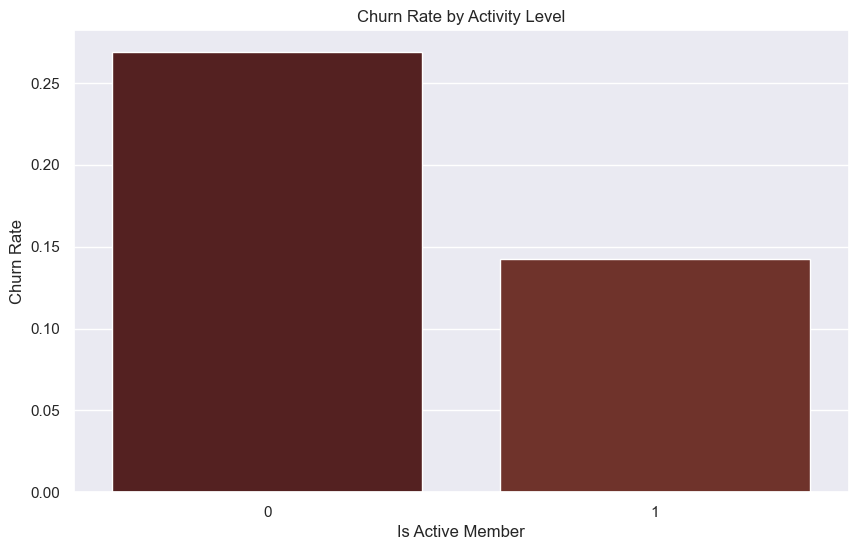

In [26]:
activity_churn = df.groupby('IsActiveMember')['Exited'].mean().reset_index()

# Plot churn rate by activity level
plt.figure(figsize=(10, 6))
sns.barplot(data=activity_churn, x='IsActiveMember', y='Exited',palette=['#5c1919','#7b2a1f','#993e22','#b65522','#d16e1f','#ea8916','#ffa600'] )
plt.title('Churn Rate by Activity Level')
plt.xlabel('Is Active Member')
plt.ylabel('Churn Rate')
plt.show()

- Customer using more number of products and active members are less likely to churn

# Financial Analysis

## 1. Balance vs. Churn Analysis

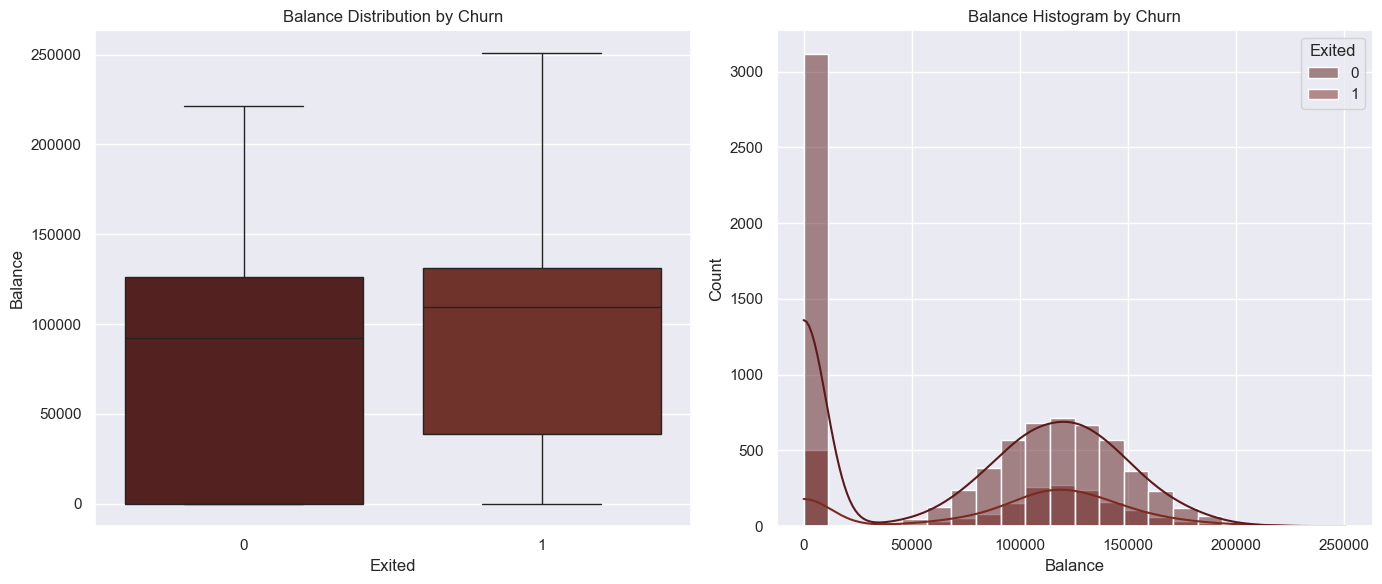

In [35]:
# Plotting balance distribution by churn
plt.figure(figsize=(14, 6))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x='Exited', y='Balance', data=df,palette=color_map)
plt.title('Balance Distribution by Churn')

# Histogram
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='Balance', hue='Exited', kde=True, palette=color_map)
plt.title('Balance Histogram by Churn')

plt.tight_layout()
plt.show()

In [32]:
# Statistical Analysis: T-test
churned_balance = df[df['Exited'] == 1]['Balance']
non_churned_balance = df[df['Exited'] == 0]['Balance']
t_stat, p_value = ttest_ind(churned_balance, non_churned_balance)

t_stat, p_value

(11.940747722508185, 1.2092076077156018e-32)

#### Visual Analysis
- The boxplot indicates that customers who churn have a slightly lower median balance compared to those who do not churn. However, the overall spread (interquartile range) of balances is similar between churned and non-churned customers.
- The histogram shows that a significant number of customers with a zero balance have a higher churn rate. This suggests that having a non-zero balance might be associated with higher customer retention.

#### Statistical Analysis
- The t-test results show a t-statistic of approximately 11.94 and a p-value of approximately \(1.21 * 10^-32\).
- Since the p_value is significantly less than 0.05, we reject the null hypothesis and conclude that there is a significant difference in the average balance between churned and non-churned customers.

## Credit Card Ownership vs. Churn Analysis

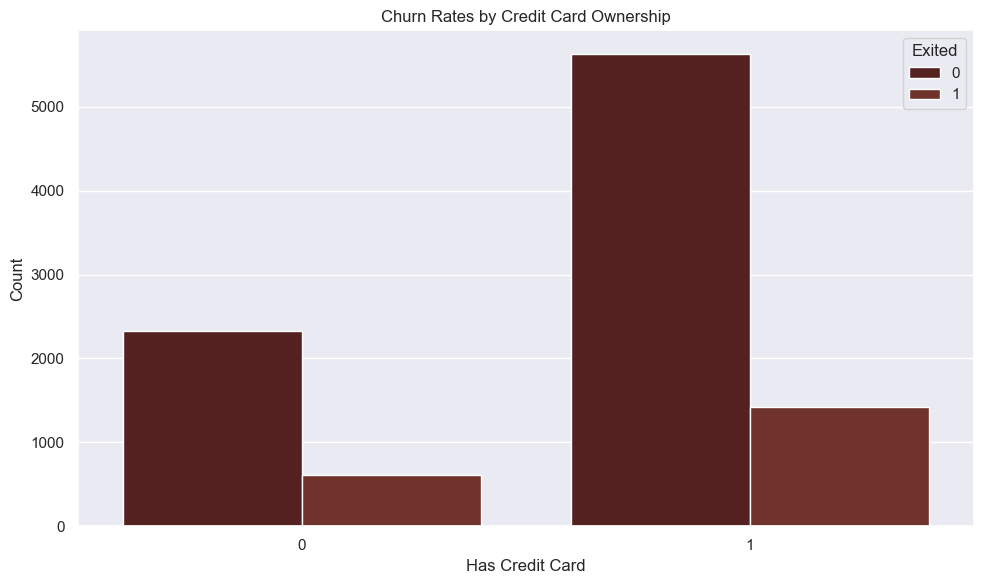

In [38]:
# Plotting churn rates by credit card ownership
plt.figure(figsize=(10, 6))

sns.countplot(x='HasCrCard', hue='Exited', data=df,palette=color_map)
plt.title('Churn Rates by Credit Card Ownership')
plt.xlabel('Has Credit Card')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [39]:
# Creating a contingency table
contingency_table = pd.crosstab(df['HasCrCard'], df['Exited'])

# Performing chi-squared test
chi2_stat, p_val, dof, ex = chi2_contingency(contingency_table)

chi2_stat, p_val

(0.4494039375253385, 0.5026181509009862)

#### Visual Analysis
- Higher Churn Among Credit Card Holders:

    - The bar plot shows that customers who own a credit card (Has Credit Card = 1) have a higher absolute number of churn compared to those who do not own a credit card.
    - This indicates that credit card ownership is associated with higher churn rates.
- Credit Card Non-Holders:

    - Customers without a credit card (Has Credit Card = 0) also experience churn, but the total number of customers in this group is significantly lower compared to credit card holders.
    - This suggests that while the presence of a credit card might increase the likelihood of churn, not having a credit card does not necessarily guarantee retention.
- Retention Among Credit Card Holders:

    - Despite the higher churn rate, a significant number of credit card holders remain loyal (Exited = 0). This group is much larger compared to non-credit card holders who remain loyal.
    - This indicates that there might be other factors influencing loyalty among credit card holders, such as satisfaction with the credit card services, rewards, or other bank offerings.

#### Statistical Analysis
- The chi2_contingency results show a chi-statistic of approximately 0.45 and a p-value of approximately 0.5.
- Since the p-value is greater than 0.05, we fail to reject the null hypothesis indicating that there is no significant association between the credit card ownership and churn rates.

# Customer Satisfaction and Feedback

## Complaint Analysis

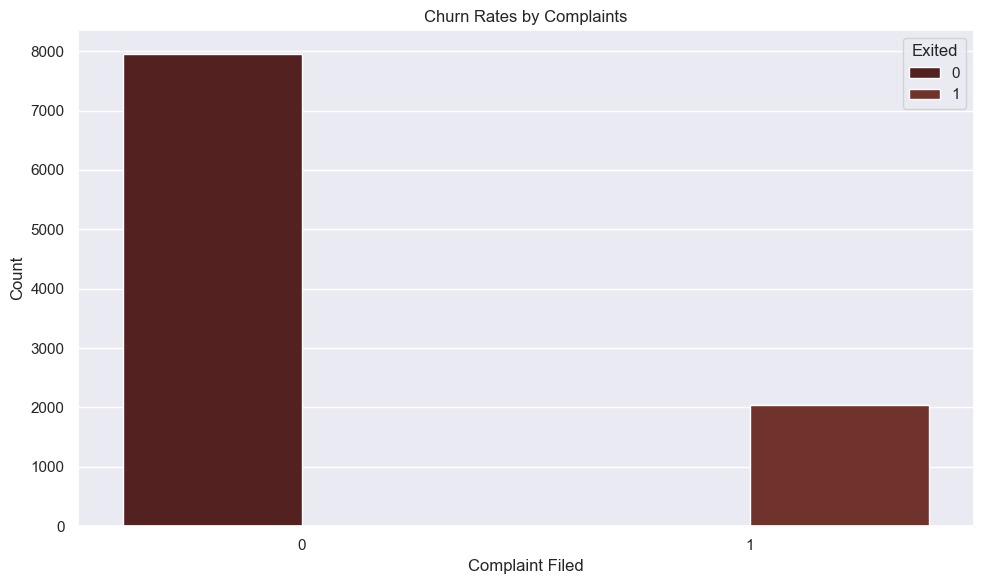

In [41]:
# Plotting churn rates by complaints
plt.figure(figsize=(10, 6))

sns.countplot(x='Complain', hue='Exited', data=df,palette=color_map)
plt.title('Churn Rates by Complaints')
plt.xlabel('Complaint Filed')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

## Satisfaction and Churn Analysis

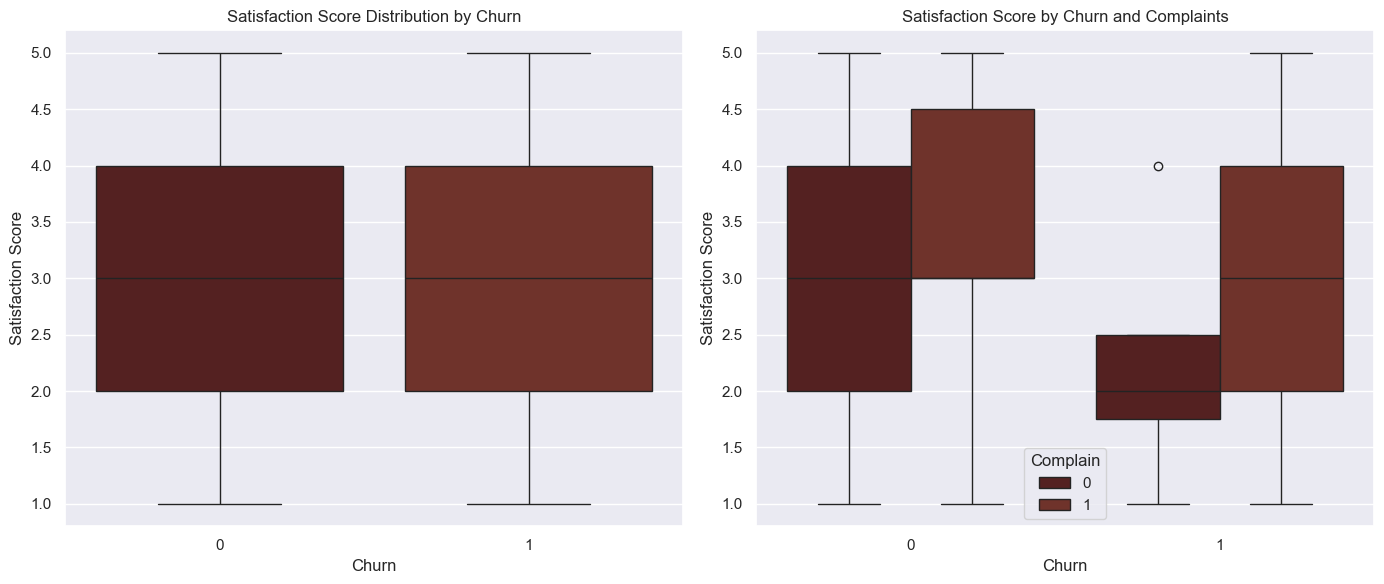

In [49]:
# Plotting satisfaction score by churn
plt.figure(figsize=(14, 6))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x='Exited', y='Satisfaction Score', data=df,palette=color_map)
plt.title('Satisfaction Score Distribution by Churn')
plt.xlabel('Churn')
plt.ylabel('Satisfaction Score')

# Satisfaction scores of customers who filed complaints
plt.subplot(1, 2, 2)
sns.boxplot(x='Exited', y='Satisfaction Score', hue='Complain', data=df,palette=color_map)
plt.title('Satisfaction Score by Churn and Complaints')
plt.xlabel('Churn')
plt.ylabel('Satisfaction Score')

plt.tight_layout()
plt.show()

In [46]:
# Performing ANOVA or t-test for satisfaction scores
complained_satisfaction = df[df['Complain'] == 1]['Satisfaction Score']
not_complained_satisfaction = df[df['Complain'] == 0]['Satisfaction Score']

t_stat_satisfaction, p_value_satisfaction = ttest_ind(complained_satisfaction, not_complained_satisfaction)

t_stat_satisfaction, p_value_satisfaction

(-0.4798650394919464, 0.6313338591380865)

- Visual Analysis:

    - Complaints and Churn: 
        - The majority of the customers did not file complaints (Complaint Filed = 0). 
        - There is a smaller subset of customers who did file complaints (Complaint Filed = 1).
    - Exited Status: 
        - Among customers who did not file complaints, there is a large count of customers who did not churn (Exited = 0). 
        - Among customers who filed complaints, the count of those who did not churn (Exited = 0) is significantly lower than those who did not file complaints.
    - The visual representation shows that filing a complaint correlates with a higher likelihood of churn.
    - The count of customers who exited (Exited = 1) is higher among those who filed complaints compared to those who did not.
    - Complaints Impact: Complaints are associated with lower satisfaction scores, particularly among churned customers.
    - Churn Impact: Churned customers generally have a lower median satisfaction score compared to non-churned customers, especially when they have complaints.
    - Variability: The presence of complaints tends to reduce the variability in satisfaction scores for both churned and non-churned customers.
    
- Statistical Analysis:

    - Since the p-value is greater than 0.05, we fail to reject the null hypothesis indicating there is no significant difference in satisfaction scores between customers who filed complaints and those who did not.

# Card Usage Analysis

## Impact of Card Type on Churn

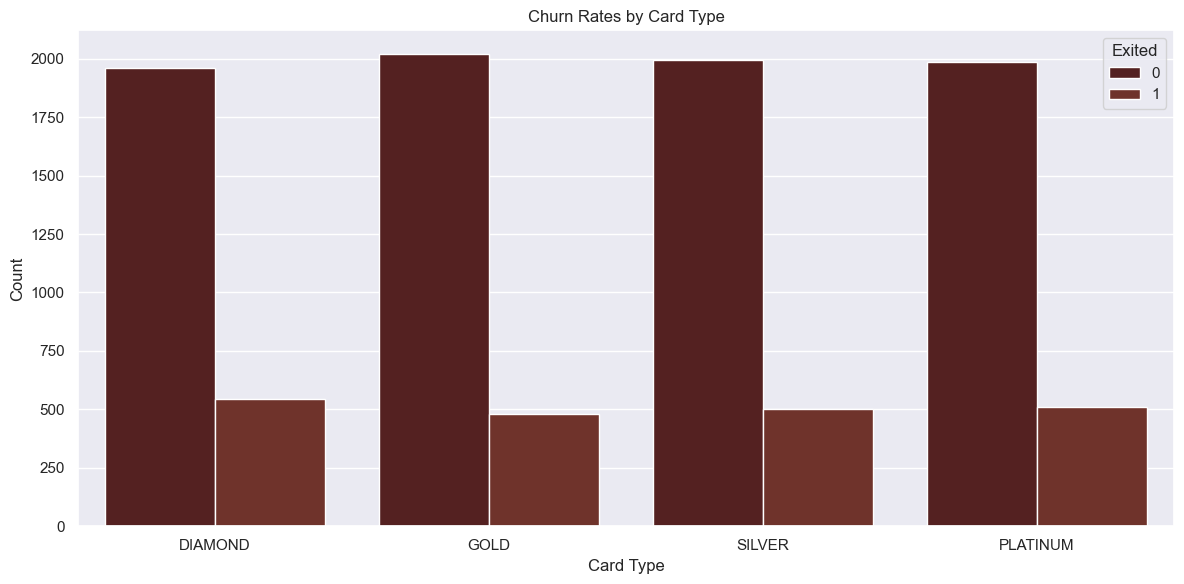

In [76]:
plt.figure(figsize=(12, 6))

sns.countplot(x='Card Type', hue='Exited', data=df,palette=color_map)
plt.title('Churn Rates by Card Type')
plt.xlabel('Card Type')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [53]:
# Creating a contingency table
card_type_contingency_table = pd.crosstab(df['Card Type'], df['Exited'])

# Performing chi-squared test
chi2_stat_card_type, p_val_card_type, dof_card_type, ex_card_type = chi2_contingency(card_type_contingency_table)

chi2_stat_card_type, p_val_card_type

(5.053223027060927, 0.16794112067810177)

### Visual Analysis
- Diamond Card:
    - The majority of Diamond cardholders did not churn (Exited = 0).
    - There is a noticeable but smaller proportion of Diamond cardholders who churned (Exited = 1).
- Gold Card:
    - Similar to Diamond cardholders, most Gold cardholders did not churn.
    - There is a smaller but significant proportion of Gold cardholders who churned.
- Silver Card:
    - The pattern for Silver cardholders is consistent with Diamond and Gold cardholders, where the majority did not churn.
    - A smaller proportion of Silver cardholders churned.
- Platinum Card:
    - Platinum cardholders show the same pattern with the majority not churning and a smaller portion churning


### Statistical Analysis
- Since p_val is greater than 0.05, we will fail to reject the null hypothesis, indicating there is no significant association between card type and churn

## Loyalty Points Analysis

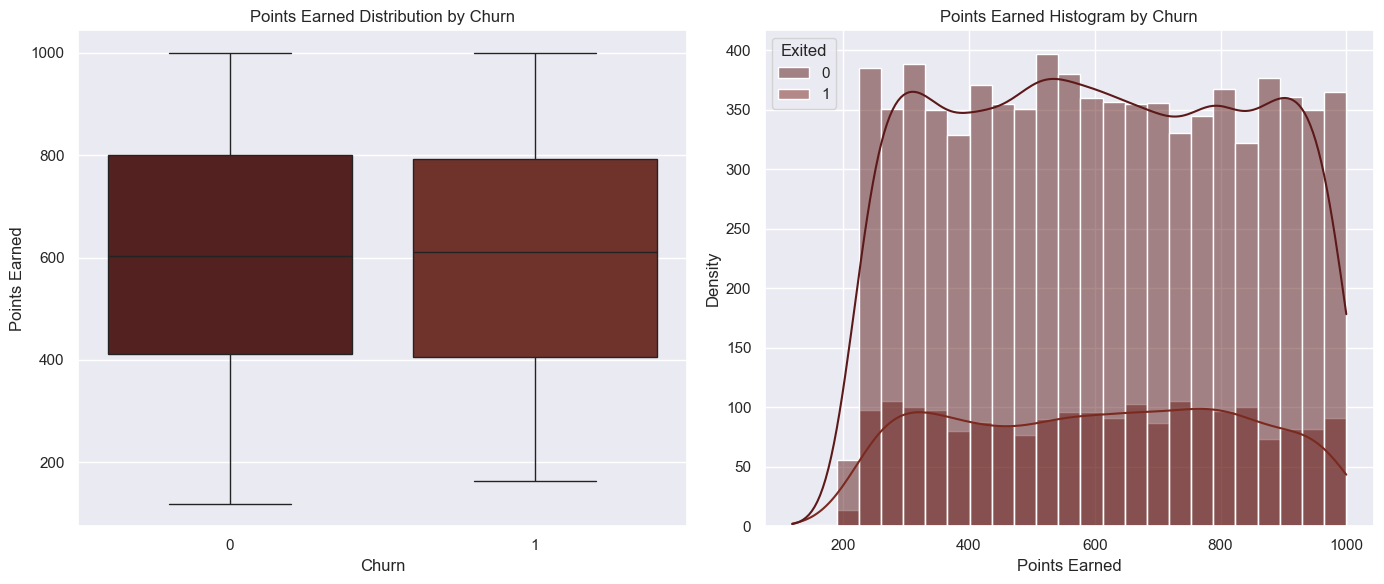

In [55]:
plt.figure(figsize=(14, 6))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x='Exited', y='Point Earned', data=df,palette=color_map)
plt.title('Points Earned Distribution by Churn')
plt.xlabel('Churn')
plt.ylabel('Points Earned')

# Histogram
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='Point Earned', hue='Exited', kde=True, palette=color_map)
plt.title('Points Earned Histogram by Churn')
plt.xlabel('Points Earned')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

In [57]:
# Performing t-test for points earned
churned_points = df[df['Exited'] == 1]['Point Earned']
non_churned_points = df[df['Exited'] == 0]['Point Earned']

t_stat_points, p_value_points = ttest_ind(churned_points, non_churned_points)

t_stat_points, p_value_points

(-0.4627759848070133, 0.6435350184288993)

### Visual Analysis
- Box Plot: Points Earned Distribution by Churn
    - Median Points Earned: The median points earned by both customers who churned and those who did not churn are similar, around 600 points. This indicates that the central tendency of points earned is not significantly different between the two groups.
    - Interquartile Range (IQR): The IQR, which represents the middle 50% of the data, is also quite similar for both groups, suggesting that the spread of points earned is comparable.
    - Range: Both groups show a similar range in points earned, from about 200 to 1000 points. This suggests that there is no drastic difference in the minimum and maximum points earned between the two groups.
- Histogram: Points Earned Histogram by Churn
    - Density Distribution: The density distribution shows that the points earned are spread across a wide range for both churned and non-churned customers. There is a noticeable peak around 200-300 points for both groups.
    - Frequency of Points Earned: The frequency of points earned seems to be relatively uniform across the range, with no significant spikes or drops for either group. This suggests that points earned are not a strong predictor of whether a customer will churn.


### Statistical Analysis
- Since the p_value_points is greater than 0.05, we fail to reject the null hypothesis, indicating there is no significant difference in points earned between churned and non-churned customers

# Salary Analysis

## Salary and Churn

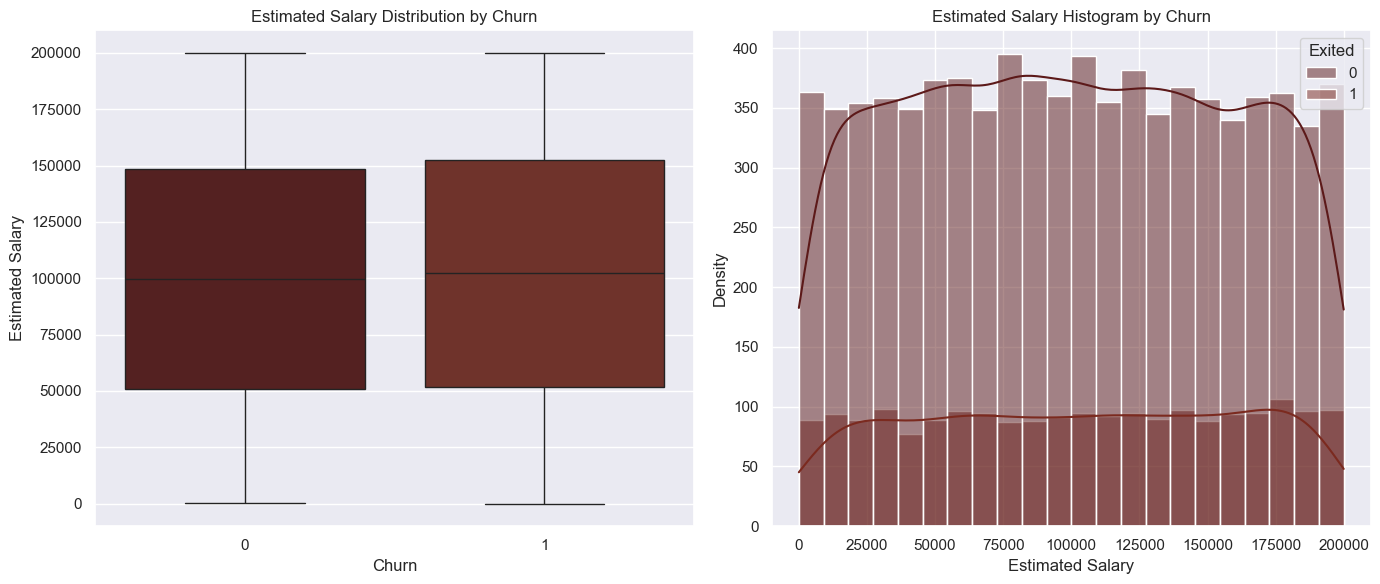

In [58]:
plt.figure(figsize=(14, 6))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x='Exited', y='EstimatedSalary', data=df,palette=color_map)
plt.title('Estimated Salary Distribution by Churn')
plt.xlabel('Churn')
plt.ylabel('Estimated Salary')

# Histogram
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='EstimatedSalary', hue='Exited', kde=True, palette=color_map)
plt.title('Estimated Salary Histogram by Churn')
plt.xlabel('Estimated Salary')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

In [59]:
# Performing t-test for estimated salary
churned_salary = df[df['Exited'] == 1]['EstimatedSalary']
non_churned_salary = df[df['Exited'] == 0]['EstimatedSalary']

t_stat_salary, p_value_salary = ttest_ind(churned_salary, non_churned_salary)

t_stat_salary, p_value_salary

(1.2489445044833742, 0.2117146135149097)

#### Visual Analysis:

- Box Plot: Estimated Salary Distribution by Churn
    - Median Estimated Salary: The median estimated salary for both churned (churn = 1) and non-churned (churn = 0) customers is similar, around $100,000. This indicates that there is no significant difference in the central tendency of estimated salary between the two groups.
    - Interquartile Range (IQR): The IQR, which represents the middle 50% of the data, is also quite similar for both groups, suggesting that the spread of estimated salaries is comparable.
    - Range: Both groups show a similar range in estimated salaries, from about $0 to $200,000. This suggests that there is no drastic difference in the minimum and maximum estimated salaries between the two groups.
- Histogram: Estimated Salary Histogram by Churn
    - Density Distribution: The density distribution shows that the estimated salaries are spread across a wide range for both churned and non-churned customers. There is a noticeable peak around $50,000-$100,000 for both groups.
    - Frequency of Estimated Salaries: The frequency of estimated salaries seems to be relatively uniform across the range, with no significant spikes or drops for either group. This suggests that estimated salary is not a strong predictor of whether a customer will churn.

#### Statistical Analysis:
 
- Since the p_value_salary is greater than 0.05, we fail to reject the null hypothesis,indicating the difference in average estimated salaries between churned and non-churned customers is not statistically significant.

### Business Insights

#### 1. **Age and Churn:**
   - **Insight:** Older customers are more likely to leave the bank. There is a moderate positive correlation (0.29) between age and churn.
   - **Recommendation:** Implement targeted retention strategies for older customers. This could include personalized financial advice, products tailored to their needs, and improved customer service for this demographic.

#### 2. **Complaints and Churn:**
   - **Insight:** Customers who have lodged complaints are more likely to exit. There is a moderate positive correlation (0.28) between complaints and churn.
   - **Recommendation:** Improve complaint resolution processes to address customer issues promptly. Consider implementing a feedback loop to understand and resolve the root causes of complaints, thereby enhancing customer satisfaction and retention.

#### 3. **Age and Complaints:**
   - **Insight:** Older customers are more likely to complain. There is a moderate positive correlation (0.28) between age and complaints.
   - **Recommendation:** Provide dedicated support for older customers to address their concerns proactively. Training customer service representatives to handle complaints from older customers with empathy and efficiency can help reduce churn.

#### 4. **NumOfProducts and Balance:**
   - **Insight:** There is a notable negative correlation (-0.3) between the number of products and balance. Customers with fewer products tend to maintain higher balances.
   - **Recommendation:** Encourage cross-selling and up-selling of additional products to customers with higher balances. Highlight the benefits of having multiple products to enhance their banking experience and financial management.

#### 5. **Balance and Churn:**
   - **Insight:** There is a weak positive correlation (0.12) between balance and churn, indicating a slight tendency for customers with higher balances to leave the bank.
   - **Recommendation:** Identify high-balance customers at risk of churn and offer personalized incentives to retain them. This could include exclusive offers, higher interest rates on savings accounts, or loyalty rewards.

#### 6. **CreditScore and Churn:**
   - **Insight:** The correlation between credit score and churn is very weak (-0.027), indicating that credit score is not a significant factor in predicting customer exit.
   - **Recommendation:** While credit score alone may not be a strong predictor of churn, it should still be considered alongside other factors in a comprehensive customer retention strategy.

#### 7. **Satisfaction Score and Churn:**
   - **Insight:** The correlation between satisfaction score and churn is very weak (-0.0058), suggesting satisfaction score has minimal impact on whether a customer exits.
   - **Recommendation:** Continue to monitor satisfaction scores but focus on improving other aspects of the customer experience that have a higher impact on churn, such as resolving complaints and providing personalized services.

#### 8. **IsActiveMember and Churn:**
   - **Insight:** There is a weak negative correlation (-0.16) between active membership and churn, indicating that active members are slightly less likely to exit.
   - **Recommendation:** Engage customers with regular interactions to keep them active. This could include personalized communications, special offers for active members, and loyalty programs to reward consistent engagement.

#### 9. **Geography Insights:**
   - **Insight:** Customers from Germany have the highest churn rate compared to those from France and Spain.
   - **Recommendation:** Investigate and address specific issues in the German market. This could involve tailored marketing campaigns, localized customer service improvements, and addressing any market-specific concerns.

#### 10. **Gender Insights:**
   - **Insight:** Female customers have a higher churn rate compared to male customers.
   - **Recommendation:** Conduct further research to understand the reasons behind higher churn rates among female customers. Develop targeted initiatives to address their specific needs and enhance their banking experience.

### General Recommendations for Customer Retention

1. **Personalized Customer Engagement:**
   - Use data analytics to understand individual customer needs and preferences. Offer personalized financial products, advice, and communications to enhance customer loyalty.

2. **Enhanced Customer Support:**
   - Improve customer service quality and response times, especially for handling complaints. Providing efficient and empathetic support can significantly reduce churn rates.

3. **Loyalty Programs:**
   - Implement loyalty programs that reward long-term customers. Offer incentives such as cashback, discounts on fees, or higher interest rates for loyal customers.

4. **Proactive Risk Management:**
   - Identify at-risk customers through predictive analytics and reach out with targeted interventions. Early identification and resolution of potential issues can prevent churn.

5. **Cross-Selling and Up-Selling:**
   - Encourage customers to use multiple products and services offered by the bank. Highlight the benefits and convenience of having all financial needs met in one place.

6. **Feedback and Improvement:**
   - Regularly collect and act on customer feedback to improve products and services. Demonstrating that the bank values and responds to customer input can enhance satisfaction and retention.

By implementing these insights and recommendations, the given bank can develop effective strategies to retain customers and reduce churn, ultimately leading to increased customer loyalty and profitability.